# Emission profiles

In [1]:
import pschitt.emission as em
import pschitt.vizualisation as viz
import pschitt.sky_objects as sky
import pschitt.geometry as geo
import pschitt.camera_image as ci
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
%matplotlib inline

Here are the angular emission profiles accessible in the emission module.   
These profiles may be used as a particle emission angular distribution.

In [3]:
em.angular_profile.constant

<function pschitt.emission.angular_profile.constant>

/Users/thomasvuillaume/anaconda/envs/pschitt/lib/python3.6/site-packages/pschitt-1.0-py3.6.egg/pschitt/emission/angular_profile.py:136: RuntimeWarning: divide by zero encountered in true_divide
  return K / angle * (np.exp(alpha * angle) - 1) * (angle < eta) \
/Users/thomasvuillaume/anaconda/envs/pschitt/lib/python3.6/site-packages/pschitt-1.0-py3.6.egg/pschitt/emission/angular_profile.py:136: RuntimeWarning: invalid value encountered in multiply
  return K / angle * (np.exp(alpha * angle) - 1) * (angle < eta) \
/Users/thomasvuillaume/anaconda/envs/pschitt/lib/python3.6/site-packages/pschitt-1.0-py3.6.egg/pschitt/emission/angular_profile.py:137: RuntimeWarning: divide by zero encountered in true_divide
  + K / angle * (np.exp(alpha * (2 * eta - angle)) - 1) * (angle >= eta) * (angle <= 2 * eta)
/Users/thomasvuillaume/anaconda/envs/pschitt/lib/python3.6/site-packages/pschitt-1.0-py3.6.egg/pschitt/emission/angular_profile.py:137: RuntimeWarning: invalid value encountered in multiply
  + 

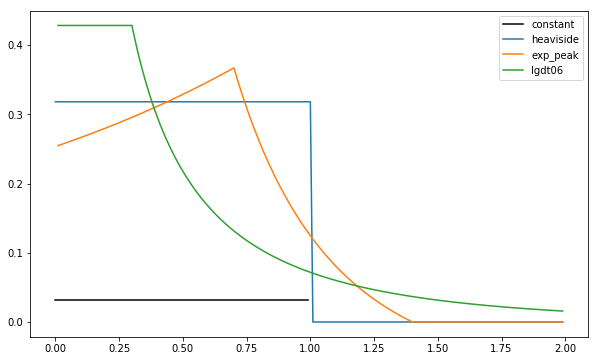

In [14]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1 = viz.plot_angular_emission_profile(em.angular_profile.constant, angle_max=1, label='constant', ax=ax1, color='black')
ax1 = viz.plot_angular_emission_profile(em.angular_profile.heaviside, 1, label='heaviside', ax=ax1)
ax1 = viz.plot_angular_emission_profile(em.angular_profile.exp_peak, 0.7, 1, label='exp_peak', ax=ax1)
ax1 = viz.plot_angular_emission_profile(em.angular_profile.lgdt06, 0.3, label='lgdt06', ax=ax1)
ax1.legend()

## Demonstration on a real exemple

### Setting up

In [15]:
shower = sky.shower()

shower.impact_point = np.array([0,20,0])

#shower direction
shower.alt = math.radians(70)
shower.az = math.radians(90)

#pointing direction off-axis
talt = math.radians(71)
taz = math.radians(89)

#shower parameters
shower_top = 12000
shower_length = 8000
shower_width = 100

shower.number_of_particles = int(1e4)

In [16]:
shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

In [17]:
tel_normal = geo.altaz_to_normal(talt,taz)
tel1 = geo.Telescope([200,200,0],tel_normal)
tel2 = geo.Telescope([-200,200,0],tel_normal)
tel3 = geo.Telescope([-200,-200,0],tel_normal)
tel4 = geo.Telescope([200,-200,0],tel_normal)
tel5 = geo.Telescope([0,0,0],tel_normal)

alltel = [tel1, tel2, tel3, tel4, tel5]

In [18]:
# alltel = geo.load_telescopes('../share/arrays/CTA_paranal.txt', normal=geo.altaz_to_normal(talt, taz))

### Site Map

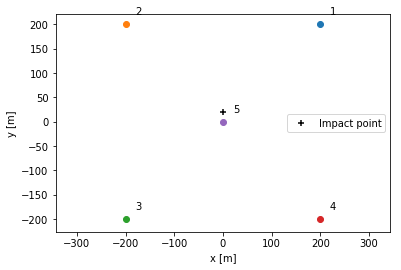

In [19]:
ax = viz.plot_array(alltel)
ax.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker="+")
ax.legend()

## Producing images in telescopes

In [20]:
trigger_intensity = 20.
noise = 0

### Constant profile

In [25]:
shower.particles_angular_emission_profile = em.angular_profile.constant
shower.particles_angular_emission_profile_kwargs = {}

In [26]:
ci.array_shower_imaging(shower, alltel, noise)

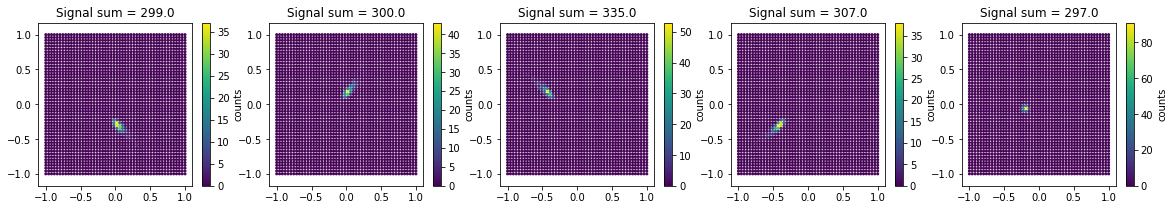

In [27]:
fig, axes = plt.subplots(1, len(alltel), figsize=(20,3))
for tel, ax in zip(alltel, axes):
    ax = viz.display_camera_image(tel, s=4, ax=ax);
    ax.set_title("Signal sum = {}".format(tel.signal_hist.sum()))

### Heaviside profile

In [29]:
shower.particles_angular_emission_profile = em.angular_profile.heaviside
shower.particles_angular_emission_profile_kwargs = {'limit':0.01}

In [30]:
ci.array_shower_imaging(shower, alltel, noise)

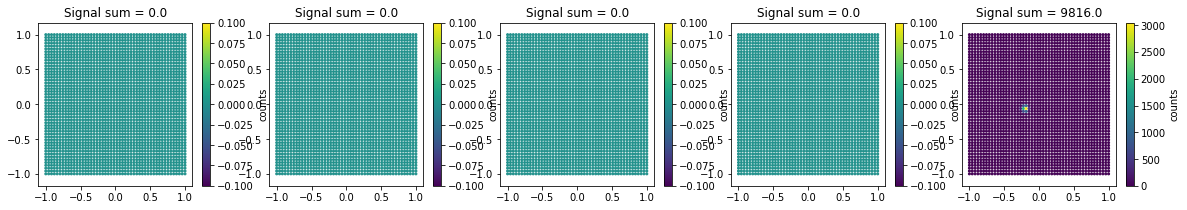

In [31]:
fig, axes = plt.subplots(1, len(alltel), figsize=(20,3))
for tel, ax in zip(alltel, axes):
    ax = viz.display_camera_image(tel, s=4, ax=ax);
    ax.set_title("Signal sum = {}".format(tel.signal_hist.sum()))

Only the telescope 5, right under the shower, got signal

### Exp peak profile

In [35]:
shower.particles_angular_emission_profile = em.angular_profile.exp_peak
shower.particles_angular_emission_profile_kwargs = {'eta':0.01, 'alpha':10}

In [36]:
ci.array_shower_imaging(shower, alltel, noise)

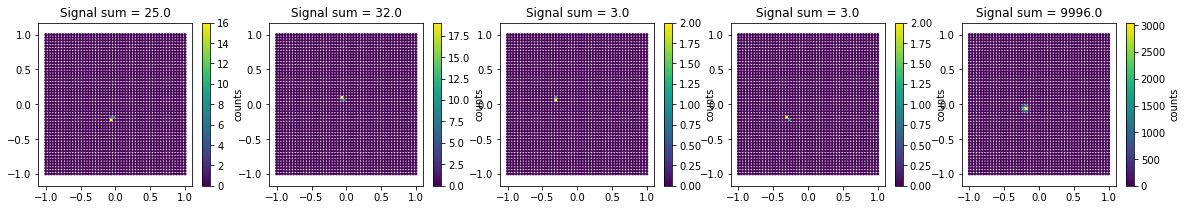

In [37]:
fig, axes = plt.subplots(1, len(alltel), figsize=(20,3))
for tel, ax in zip(alltel, axes):
    ax = viz.display_camera_image(tel, s=4, ax=ax);
    ax.set_title("Signal sum = {}".format(tel.signal_hist.sum()))

The signal received by telescopes 1 to 4 is reduced compared to the constant profile exemple

### lgdt [Lemoine et al 06] profile

In [63]:
shower.particles_angular_emission_profile = em.angular_profile_dummy_cherenkov
shower.particles_angular_emission_profile_kwargs = {'max_angle':0.03}

In [64]:
ci.array_shower_imaging(shower, alltel, noise)

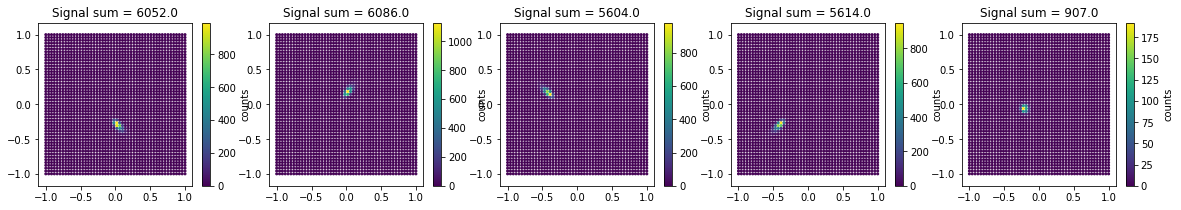

In [65]:
fig, axes = plt.subplots(1, len(alltel), figsize=(20,3))
for tel, ax in zip(alltel, axes):
    ax = viz.display_camera_image(tel, s=4, ax=ax);
    ax.set_title("Signal sum = {}".format(tel.signal_hist.sum()))

The telescope 5, right under the shower, got less signal as the emission at the center of the cone is 0